In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving accident-2014-4.csv to accident-2014-4.csv


In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

df = pd.read_csv(io.BytesIO(uploaded['accident-2014-4.csv']))
print(df.head().to_markdown())

|    | Reference Number   |   Grid Ref: Easting |   Grid Ref: Northing |   Number of Vehicles | Accident Date   |   Time (24hr) |   1st Road Class | 1st Road Class & No   |   Road Surface |   Lighting Conditions |   Weather Conditions | Local Authority   |   Casualty Class |   Casualty Severity |   Sex of Casualty |   Age of Casualty |   Vehicle Number |   Type of Vehicle |
|---:|:-------------------|--------------------:|---------------------:|---------------------:|:----------------|--------------:|-----------------:|:----------------------|---------------:|----------------------:|---------------------:|:------------------|-----------------:|--------------------:|------------------:|------------------:|-----------------:|------------------:|
|  0 | 11S0281            |              407491 |               428929 |                    1 | 28-01-2014      |           835 |                6 | U                     |              2 |                     1 |                    9 | Calderdal

Index(['Number of Vehicles', 'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Sex of Casualty', 'Age of Casualty',
       'Type of Vehicle', 'Casualty Severity'],
      dtype='object')

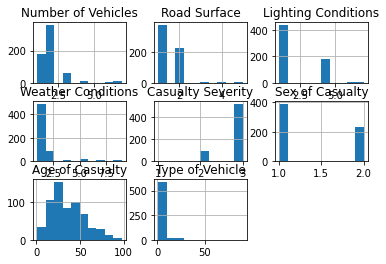

In [ ]:
#Drop the columns with the non numerical values.
df1 = df
num_df =df1.drop(['Grid Ref: Easting', 'Grid Ref: Northing','Reference Number','Accident Date','Time (24hr)', '1st Road Class','Casualty Class', '1st Road Class & No','Vehicle Number','Local Authority'], axis=1)
num_df.columns
num_df.hist()

# Bring the class attribute as the last column
# The casulaty Severity here has 3 values.. 1.Fatal, 2.Seriuos . 3.Slight

temp_series = num_df.pop('Casualty Severity')
num_df['Casualty Severity'] = temp_series
num_df.columns

In [ ]:
df.nunique()

Reference Number       427
Grid Ref: Easting      410
Grid Ref: Northing     409
Number of Vehicles       7
Accident Date          253
Time (24hr)            261
1st Road Class           4
1st Road Class & No     24
Road Surface             5
Lighting Conditions      5
Weather Conditions       8
Local Authority          1
Casualty Class           3
Casualty Severity        3
Sex of Casualty          2
Age of Casualty         88
Vehicle Number           7
Type of Vehicle         12
dtype: int64

In [ ]:
# importing the sklearn library
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# getting the x(dataset excluding the class attribute) and y(class attribute) dataset from class data set
x = num_df.drop('Casualty Severity',axis=1)
y = num_df['Casualty Severity']

# Get dummy variable 
y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.25)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,),random_state=1, max_iter=300).fit(X_train, y_train)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_train)
print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(X_train),multi_class="ovr"))

Overall AUC: 0.7795678187519647


In [ ]:
# y_pred = clf.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# cm

In [ ]:
# Initialize variables
learning_rate = 0.1
iterations = 500
N = y_train.size

# number of input features
input_size = 7

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

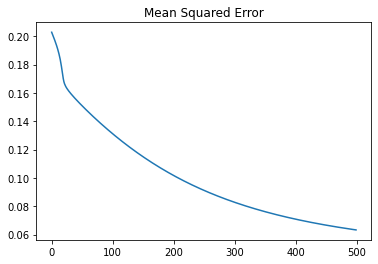

In [ ]:
results.mse.plot(title="Mean Squared Error")

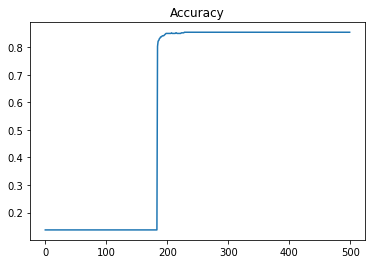

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
y_pred = clf.predict_proba(X_train)
print('Overall AUC:', roc_auc_score(y_train,y_pred,multi_class="ovr"))

Overall AUC: 0.7795678187519647
